## Loading packages

In [1]:
from project_functions import *

/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Read in dataset

In [2]:
left = load_data('left_dataset.csv')
right = load_data('right_dataset.csv')

## EDA

### Check the shape of left & right datasets

In [3]:
left.shape

(98509, 7)

In [4]:
right.shape

(94585, 7)

### Check the data type of each column

In [5]:
left.dtypes

business_id      int64
name            object
address         object
city            object
state           object
zip_code        object
size           float64
dtype: object

In [6]:
right.dtypes

entity_id        int64
name            object
address         object
city            object
state           object
postal_code    float64
categories      object
dtype: object

### View the first 5 rows of the datasets

In [7]:
left.head()

,business_id,name,address,city,state,zip_code,size
0,1,SOURINI PAINTING INC.,12800 44th St N,Clearwater,FL,33762-4726,11.0
1,2,WOLFF DOLLA BILL LLC,1905 E 19th Ave,Tampa,FL,33605-2700,8.0
2,3,"COMPREHENSIVE SURGERY CENTER, LLC","1988 GULF TO BAY BLVD, Ste 1",CLEARWATER,FL,33765-3550,8.0
3,4,FRANK & ADAM APPAREL LLC,13640 Wright Cir,Tampa,FL,33626-3030,12.0
4,5,MORENO PLUS TRANSPORT INC,8608 Huron Court unite 58,Tampa,FL,33614,8.0


In [8]:
right.head()

,entity_id,name,address,city,state,postal_code,categories
0,1,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123.0,"Shipping Centers, Local Services, Notaries, Ma..."
1,2,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
2,3,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054.0,"Brewpubs, Breweries, Food"
3,4,Sonic Drive-In,615 S Main St,Ashland City,TN,37015.0,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
4,5,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144.0,"Sporting Goods, Fashion, Shoe Stores, Shopping..."


#### Change postal_code to zip_code in right dataset

In [9]:
mapping = {right.columns[5]:'zip_code'}
right.rename(columns=mapping, inplace = True)

### State distribution

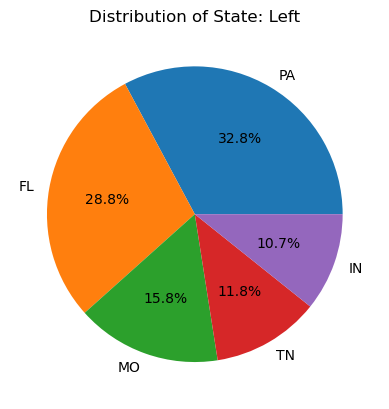

In [10]:
# Pie chart of state distribution in left data
state_pie(left, 'Left')

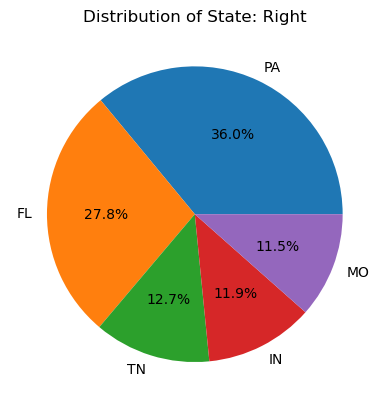

In [11]:
# Pie chart of state distribution in right data
state_pie(right, 'Right')

### Top 15 City Distribution

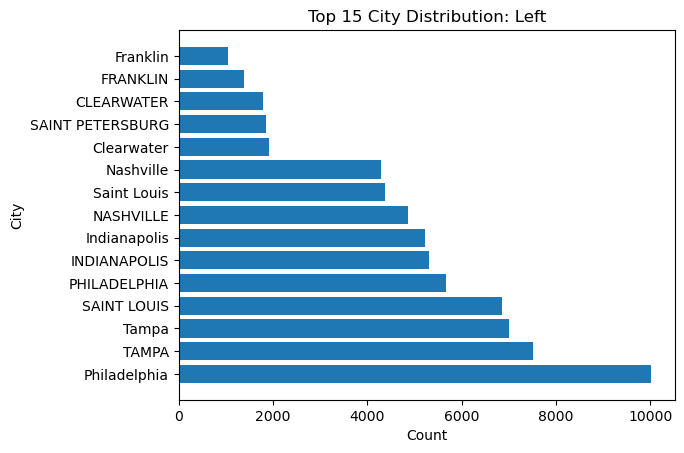

In [12]:
# Top 15 city distribution in left data
city_bar(left, 'Left')

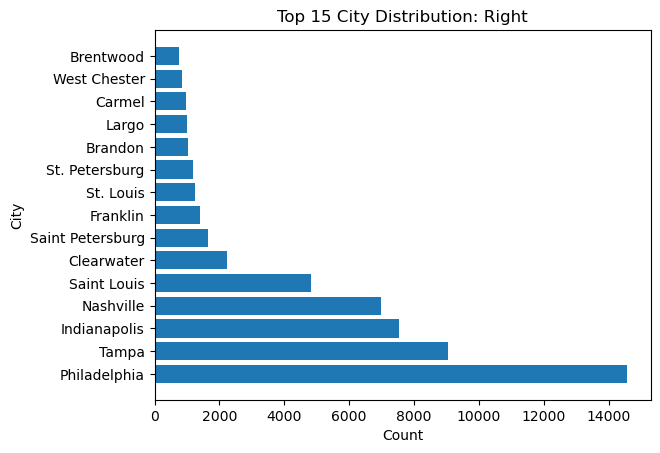

In [13]:
# Top 15 city distribution in right data
city_bar(right, 'Right')

### Zip Codes Distribution by States

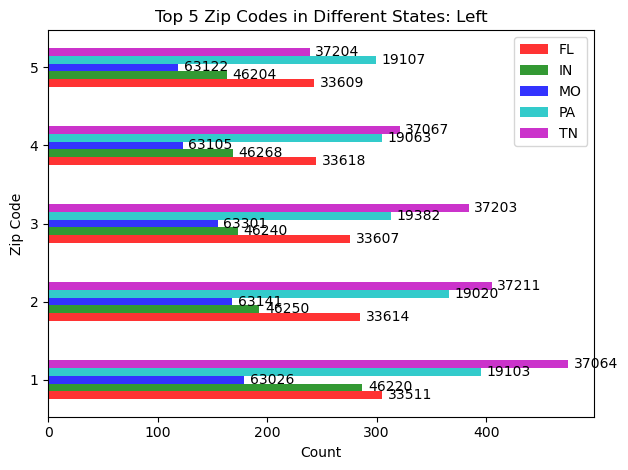

In [14]:
# Top 5 zip codes in different states in left data
zip_bar(left, 'Left')

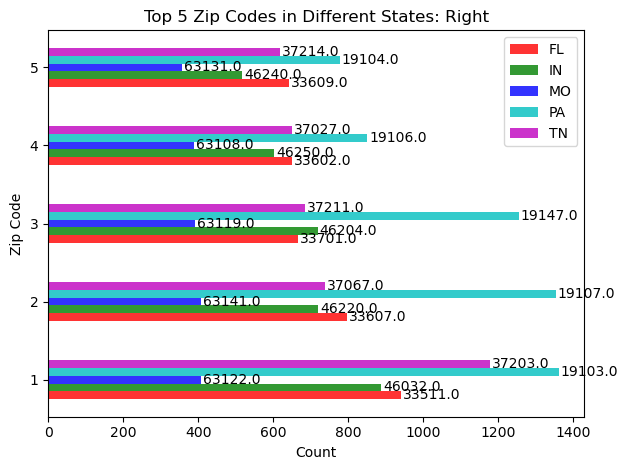

In [15]:
# Top 5 zip codes in different states in right data
zip_bar(right, 'Right')

## Data Cleaning & Standardization

In [16]:
# remove the column named "size" in left dataset and "categories" in right dataset
left = left.drop("size", axis=1)
right = right.drop("categories", axis=1)

### State

In [17]:
# state looks fine
left['state'].unique()

array(['FL', 'IN', 'MO', 'PA', 'TN'], dtype=object)

In [18]:
right['state'].unique()

array(['MO', 'PA', 'TN', 'FL', 'IN'], dtype=object)

### Zip code

In [19]:
# remove zip code extension and leave only 5 digits, ignore None value
left['zip_code'] = left['zip_code'].str[:5]


In [20]:
right['zip_code'] = right['zip_code'].astype(str).str[:5]

### Name, Address, City

#### Convert name, address, city to lowercase, remove punctuation and trailing whitespace

#### Left dataset

In [21]:
standarlize(left, 'name')
standarlize(left, 'address')
standarlize(left, 'city')

/Users/zhangshuxin/APAN5210/final project/project_functions.py:78: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace(r'[^\w\s]+', '')


#### Right dataset

In [22]:
standarlize(right, 'name')
standarlize(right, 'address')
standarlize(right, 'city')

#### Replace abbreviations in address to full names

In [23]:
abb_to_full(left, 'address')

In [24]:
abb_to_full(right, 'address')

### Examine Data Entry Inconsistencies in City

#### Left dataset

In [25]:
left_city = unique_city(left)
left_city

array(['ardmore', 'ballwin', 'bensalem', 'brandon', 'bryn mawr',
       'clearwater', 'collegeville', 'conshohocken', 'doylestown',
       'exton', 'fenton', 'florissant', 'franklin', 'havertown',
       'indianapolis', 'king of prussia', 'langhorne', 'lansdale',
       'largo', 'levittown', 'lutz', 'malvern', 'media', 'nashville',
       'new port richey', 'newtown', 'norristown', 'north wales',
       'palm harbor', 'philadelphia', 'phoenixville', 'pottstown',
       'saint charles', 'saint louis', 'saint petersburg', 'springfield',
       'st louis', 'st petersburg', 'tampa', 'warminster', 'wayne',
       'west chester', 'willow grove'], dtype=object)

#### 'saint louis', 'saint petersburg','st louis', 'st petersburg' need to be changed

#### Get the top 10 closest matches to "st louis" and "st petersburg", get cut matching ratio for replacement

In [26]:
get_top10_match('saint louis', left_city)

[('saint louis', 100),
 ('st louis', 84),
 ('florissant', 76),
 ('saint charles', 67),
 ('saint petersburg', 52),
 ('lutz', 40),
 ('norristown', 38),
 ('warminster', 38),
 ('west chester', 35),
 ('ballwin', 33)]

In [27]:
get_top10_match('saint petersburg', left_city)

[('saint petersburg', 100),
 ('st petersburg', 90),
 ('saint charles', 55),
 ('saint louis', 52),
 ('florissant', 46),
 ('west chester', 43),
 ('ballwin', 35),
 ('franklin', 33),
 ('st louis', 33),
 ('pottstown', 32)]

#### Set min ratio to 80

#### Replace for consistency

In [28]:
# use the function we just wrote to replace close matches to "st. louis" with "st. louis"
replace_matches_in_column(df = left, column='city', string_to_match="saint louis", min_ratio = 80)
# use the function we just wrote to replace close matches to "st.petersburg" with "st.petersburg"
replace_matches_in_column(df = left, column='city', string_to_match="saint petersburg", min_ratio = 80)

In [29]:
# Examine the uniqueness of the cities
left_city = unique_city(left)
left_city

array(['ardmore', 'ballwin', 'bensalem', 'brandon', 'bryn mawr',
       'clearwater', 'collegeville', 'conshohocken', 'doylestown',
       'exton', 'fenton', 'florissant', 'franklin', 'havertown',
       'indianapolis', 'king of prussia', 'langhorne', 'lansdale',
       'largo', 'levittown', 'lutz', 'malvern', 'media', 'nashville',
       'new port richey', 'newtown', 'norristown', 'north wales',
       'palm harbor', 'philadelphia', 'phoenixville', 'pottstown',
       'saint charles', 'saint louis', 'saint petersburg', 'springfield',
       'tampa', 'warminster', 'wayne', 'west chester', 'willow grove'],
      dtype=object)

#### Right dataset

In [30]:
right_city = unique_city(right)
right_city

array(['abington', 'abington township', 'affton', 'afton', 'aldan',
       'ambler', 'andalusia', 'antioch', 'apollo beach', 'apopka',
       'ardmore', 'arnold', 'arrington', 'ashland', 'ashland city',
       'aston', 'audubon', 'avon', 'avondale', 'bala cynwyd', 'ballwin',
       'balm', 'bargersville', 'barnhart', 'barto', 'bayonet point',
       'beech grove', 'bel ridge', 'bellair', 'belle meade', 'belleair',
       'belleair beach', 'belleair blf', 'belleair bluffs',
       'belleair blufs', 'bellefontaine', 'bellefontaine neighbors',
       'bellevue', 'belmont hills', 'bensalem', 'bensalem pa',
       'bensalem township', 'berkeley', 'berry hill', 'berwyn', 'bethel',
       'bethel township', 'birchrunville', 'black jack', 'blooming glen',
       'blue bell', 'blvd', 'boone', 'boothwyn', 'boulevard', 'boyertown',
       'bradenton', 'bradenton beach', 'brandon', 'breckenridge hills',
       'brentwood', 'brentwood  cool springs', 'bridgeport', 'bridgeton',
       'bristol', 'br

#### There are too many non-standardized city entry with unknown reason, thus we only replace 'st' to 'saint'

In [31]:
# check cities contain 'st'
right[right['city'].str.contains(r'\bst\b') == True]['city'].unique()

array(['st petersburg', 'st louis', 'st pete beach', 'st charles',
       'st davids', 'st louis downtown', 'st ann', 'st pete', 'st  louis',
       'st petersberg', 'st loius', 'st peters', 'st louis county',
       'st petersurg', 'st leo', 'st  charles'], dtype=object)

In [32]:
# replace 'st' with 'saint'
right['city'] = right['city'].replace( r'\bst\b', 'saint', regex=True)

### Check Dataset after preprocessing

In [33]:
left.head()

,business_id,name,address,city,state,zip_code
0,1,sourini painting inc,12800 44th street north,clearwater,FL,33762
1,2,wolff dolla bill llc,1905 east 19th avenue,tampa,FL,33605
2,3,comprehensive surgery center llc,1988 gulf to bay boulevard suite 1,clearwater,FL,33765
3,4,frank adam apparel llc,13640 wright circle,tampa,FL,33626
4,5,moreno plus transport inc,8608 huron court unite 58,tampa,FL,33614


In [34]:
right.head()

,entity_id,name,address,city,state,zip_code
0,1,the ups store,87 grasso plaza shopping center,affton,MO,63123
1,2,st honore pastries,935 race street,philadelphia,PA,19107
2,3,perkiomen valley brewery,101 walnut street,green lane,PA,18054
3,4,sonic drivein,615 south main street,ashland city,TN,37015
4,5,famous footwear,8522 eager road dierbergs brentwood point,brentwood,MO,63144


### Check null value in 'address' and drop these rows

In [35]:
sum_null(left,'address')

0

In [36]:
sum_null(right,'address')

2798

In [37]:
drop_null(right, 'address')

In [38]:
right.shape

(91787, 6)

## Fuzzy Matching

### Divide left and right datasets by state

In [39]:
left['state'].value_counts()

PA    32335
FL    28373
MO    15613
TN    11613
IN    10575
Name: state, dtype: int64

In [40]:
right['state'].value_counts()

PA    32994
FL    25457
TN    11671
IN    10991
MO    10674
Name: state, dtype: int64

### Use TN as an example

In [41]:
left_TN = state(left, 'TN')
right_TN = state(right, 'TN')

In [42]:
left_TN['zip_code'].value_counts().head()

37203    1339
37064    1217
37211    1078
37067     937
37204     631
Name: zip_code, dtype: int64

In [44]:
right_TN['zip_code'].value_counts().head()

37203    1145
37067     730
37211     650
37027     639
37214     602
Name: zip_code, dtype: int64

### Match within each state, then match within each zip code

#### Since the sizes of the datasets are very large, we will divide them into subsets in the same state and then divide each state-subset into smaller chunks with the same zip code to avoid useless matchings and to reduce execution time. Businesses not in the same state and not with the same zip code cannot be the same one.

#### Get a dataframe containing all common zip codes in left_TN and right_TN and number of counts

In [45]:
zip_match_TN = zip_match(left_TN, right_TN)
zip_match_TN.head()

,zip_code,count_x,count_y
0,37203,1339,1145
1,37064,1217,580
2,37211,1078,650
3,37067,937,730
4,37204,631,403


#### TN matching results

In [153]:
start_time = time.time()

find_match_byzip(zip_match_TN, left_TN, right_TN, 'matches_TN_byzip.csv')

end_time = time.time()

execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

     left  right  confidence_score
0   86981  83445             0.932
1   86982  83445             0.952
2   86996  65304             1.000
3   87011  20545             1.000
4   87024   1957             1.000
..    ...    ...               ...
0   93250  92223             0.828
0   92865  41863             0.912
1   95394  93980             0.876
0   87651  52242             0.898
0   97815  71477             0.972

[2931 rows x 3 columns]
Execution time: 1803.80 seconds


### Use the same method to get matching results in each state. Each group member took care of one state. Load the five matching result files.

In [46]:
match_PA = pd.read_csv('matches_PA_byzip.csv')
match_FL = pd.read_csv('matches_FL_byzip.csv')
match_MO = pd.read_csv('matches_MO_byzip.csv')
match_TN = pd.read_csv('matches_TN_byzip.csv')
match_IN = pd.read_csv('matches_IN_byzip.csv')

### Concatenate five result files to one dataframe

In [47]:
all_match = pd.concat([match_PA, match_FL, match_MO, match_TN, match_IN])

### Examine all matching results

In [48]:
all_match.shape

(26265, 3)

### Number of exact matching

In [49]:
len(all_match[all_match['confidence_score'] == 1.0])

6591

### Sort the results by confidence score by descending order

In [50]:
match_sorted = all_match.sort_values(by=['confidence_score'], ascending=False)

### Visualize matching results

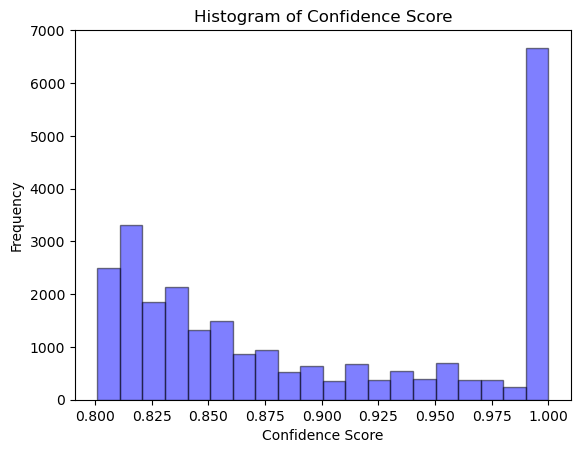

In [51]:
visualize_match(match_sorted)

### Review the results and check matching quality

In [52]:
match_sorted[10900:10910]

,left,right,confidence_score
5370,86451,81764,0.900
3747,3793,29849,0.900
1724,18179,93459,0.900
556,87527,21337,0.900
774,32232,60962,0.900
6526,66615,69368,0.900
4949,57231,19754,0.900
3177,60841,2050,0.900
3168,60020,64165,0.900
282,43066,58150,0.899


In [53]:
left[left['business_id'] == 43066]

,business_id,name,address,city,state,zip_code
43065,43066,allstar moving llc,333 leffingwell avenue suite 127,saint louis,MO,63122


In [54]:
right[right['entity_id'] == 58150]

,entity_id,name,address,city,state,zip_code
58149,58150,all star moving llc,333 leffingwell avenue suite 127,kirkwood,MO,63122


### Choose confidence score = 0.90 as a threshold for acceptable matchings

In [55]:
match_gt90 = match_sorted[match_sorted['confidence_score'] > 0.90]

In [56]:
match_gt90.shape

(10692, 3)

In [57]:
match_gt90.to_csv('match_results.csv', index=False)